## Занятие 3
## Математический анализ
## Решение нелинейных уравнений в Sympy. Solve и solveset.
https://docs.sympy.org/latest/modules/solvers/solveset.html

In [37]:
from sympy import Symbol, symbols, S, solve, solveset, Intersection, Interval, EmptySet, Union, Eq, plot
import sympy
# Продолжим использовать магию
%matplotlib inline

### Задание 1
Решить уравнение $6x^4 + 9x^3 - 99x^2 - 66x + 360 = 0$ с помощью solve и solveset.

In [26]:
x = Symbol("x")
eq = 6*x**4 + 9*x**3 - 99*x**2 - 66*x + 360
print(solve(eq))
print(solveset(eq))

[-4, -5/2, 2, 3]
{-4, -5/2, 2, 3}


### Задание 2.
Найти только вещественные решения уравнения $12x^8 + 32x^6 + 21x^4 - 2x^2 - 3 = 0$.

In [27]:
x = Symbol("x")
eq = 12*x**8 + 32*x**6 + 21*x**4 - 2*x**2 - 3
print(solveset(eq, domain=S.Reals))

{-sqrt(3)/3, sqrt(3)/3}


### Задание 3.
Решить уравнение $\log_2(\sin(x))=-1$. 

In [28]:
x = Symbol("x")
eq = sympy.log(sympy.sin(x), 2)
display(solveset(Eq(eq, -1)))

Union(ImageSet(Lambda(_n, 2*_n*pi + 5*pi/6), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi/6), Integers))

### Задание 4.
Найти решения уравнения $2{\rm tg}^2(x) - 3{\rm tg}(x) - 5 = 0$ на открытом интервале  $(-5\pi/4, 11\pi/4)$. 

In [30]:
x = Symbol("x")
t = sympy.tan(x)
eq = 2*t**2 - 3*t - 5
display(solveset(eq))
display(Intersection(solveset(eq), Interval.open(-5*sympy.pi/4, 11*sympy.pi/4)))

Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + atan(5/2) + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi + atan(5/2)), Integers))

{-pi/4, 3*pi/4, 7*pi/4, -pi + atan(5/2), atan(5/2) + pi, atan(5/2) + 2*pi, atan(5/2)}

### Задание 5.
Найти область определения функции $\sqrt{\sin^2 x - 1}$.

In [31]:
x = Symbol("x")
eq = sympy.sin(x)**2
display(solveset(Eq(eq, 1)))

Union(ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + 3*pi/2), Integers))

### Задание 6.
Найти решение уравнения $\frac{(x^3 + 5 x^2 - 3 x - 15)\ln(x^2 - 3)}{x^2 - 3 x + 2} = 0$. Выполнить проверку подстановкой subs.
#### Указание.
Решение нужно разбить на части. Нужно учесть область определения выражения в левой части уравнения.

In [32]:
x = Symbol("x")
e1 = x**2 - 3
e2 = x**2 - 3*x + 2
lim1 = solveset(e1 > 0)
lim2 = S.Reals - solveset(e2)
lim = Intersection(lim2, lim1)
eq1 = x**3 + 5*x**2 - 3*x - 15
eq2 = sympy.log(e1)
sol2 = solveset(eq2)
sol1 = solveset(eq1)
res = Intersection(Union(sol1, sol2), lim)
display(res)
for i in res:
    display((eq1*eq2/e2).subs(x, i))

{-5, -2}

0

0

### Индивидуальное задание.
Через все точки пересечения графиков функций $f(x)$ и $g(x)$ провести горизонтальные прямые. Изобразить на графике $f(x)$ зеленым цветом, $g(x)$ красным, горизонтальные линии черным. 
Формулы для $f(x)$ и $g(x)$ включить в легенду.

$f(x)=\frac{(x + 2)(3x + 20)}{8}$
$g(x)=\frac{15x^2}{8}+\frac{37x}{4}+5$

In [33]:
ex1 = (x + 2)*(3*x + 20)/8
ex2 = 15*x**2/8 + 37*x/4 + 5
res = solveset(Eq(ex1,ex2))
res

{-4, 0}

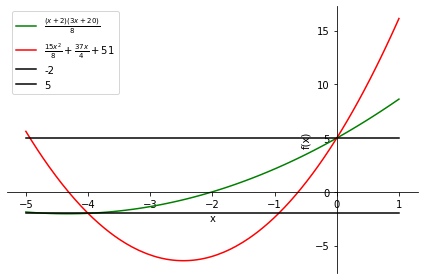

In [40]:
x_limits = (x, min(res) - 1, max(res) + 1)
point1, point2 = [(x0, ex1.subs(x, x0)) for x0 in res]
p = plot(ex1, x_limits, line_color='green', legend=True, label='$\\frac{(x + 2)(3x + 20)}{8}$', show=False)
p.append(plot(ex2, x_limits, line_color='red', legend=True, label='$\\frac{15x^2}{8}+\\frac{37x}{4}+51$', show=False)[0])
p.append(plot(point1[1], x_limits, line_color='black', legend=False, show=False)[0])
p.append(plot(point2[1], x_limits, line_color='black', legend=False, show=False)[0])
p.show()